In [ ]:
# Fonte: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('consolidada.csv')

## Data Cleaning dos Dados

In [ ]:
# Visualização da Tabela
df.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Regiao - Sigla.1
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,03/01/2023,3.39,NaN,R$ / litro,BRANCA,NaN
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,03/01/2023,6.21,NaN,R$ / litro,BRANCA,NaN
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,03/01/2023,4.39,NaN,R$ / litro,BRANCA,NaN
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,02/01/2023,3.89,NaN,R$ / litro,VIBRA ENERGIA,NaN
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,02/01/2023,6.49,NaN,R$ / litro,VIBRA ENERGIA,NaN


In [ ]:
# Renomeando as colunas para melhor legibilidade
df.rename(columns={'Regiao - Sigla': 'Regiao'}, inplace=True)
df.rename(columns={'Estado - Sigla': 'Estado'}, inplace=True)


# Mudando a coluna Data da Coleta para datetime
df['Data da Coleta'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y')

In [ ]:
df.head()

,Regiao,Estado,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Regiao - Sigla.1
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,ETANOL,2023-01-03,3.39,NaN,R$ / litro,BRANCA,NaN
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,DIESEL S10,2023-01-03,6.21,NaN,R$ / litro,BRANCA,NaN
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,00.003.188/0001-21,RUA HUMBERTO DE CAMPOS,306,NaN,JARDIM ZULMIRA,18061-000,GASOLINA,2023-01-03,4.39,NaN,R$ / litro,BRANCA,NaN
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,ETANOL,2023-01-02,3.89,NaN,R$ / litro,VIBRA ENERGIA,NaN
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,02.817.655/0001-82,RODOVIA AL 220 - KM 06,S/N,NaN,PLANALTO,57308-000,DIESEL,2023-01-02,6.49,NaN,R$ / litro,VIBRA ENERGIA,NaN


In [ ]:
# Retirando as colunas que não são necessárias para nossa análise
df = df.drop(columns=['CNPJ da Revenda','Nome da Rua','Numero Rua','Complemento','Bairro','Cep','Regiao - Sigla.1'])
df.head()

,Regiao,Estado,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,2023-01-03,3.39,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,DIESEL S10,2023-01-03,6.21,NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,2023-01-03,4.39,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2023-01-02,3.89,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,DIESEL,2023-01-02,6.49,NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666398 entries, 0 to 4666397
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao             object        
 1   Estado             object        
 2   Municipio          object        
 3   Revenda            object        
 4   Produto            object        
 5   Data da Coleta     datetime64[ns]
 6   Valor de Venda     float64       
 7   Valor de Compra    object        
 8   Unidade de Medida  object        
 9   Bandeira           object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 356.0+ MB


In [ ]:
# Aqui, vemos que há numeros na coluna Valor de Compra
valores_validos = df[df['Valor de Compra'].notna()]['Valor de Compra'].unique()
print(valores_validos)

['4,1743' '3,0162' '3,5403' ... '2,2773' '3,8002' '2,3552']


In [ ]:
# Fazemos a troca da "," para o "." pois o pandas nao entende a unidade de medida "," e depois transformamos a coluna Valor de Compra para o tipo numérico

df['Valor de Compra'] = (
    df['Valor de Compra']
    .astype(str)  # garante que tudo é string
    .str.replace(',', '.', regex=False)  # troca vírgula por ponto
)

# Converte para número (float ou int)
df['Valor de Compra'] = pd.to_numeric(df['Valor de Compra'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666398 entries, 0 to 4666397
Data columns (total 10 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao             object        
 1   Estado             object        
 2   Municipio          object        
 3   Revenda            object        
 4   Produto            object        
 5   Data da Coleta     datetime64[ns]
 6   Valor de Venda     float64       
 7   Valor de Compra    float64       
 8   Unidade de Medida  object        
 9   Bandeira           object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 356.0+ MB


In [ ]:
df.head()

,Regiao,Estado,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,2023-01-03,3.39,NaN,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,DIESEL S10,2023-01-03,6.21,NaN,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,2023-01-03,4.39,NaN,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2023-01-02,3.89,NaN,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,DIESEL,2023-01-02,6.49,NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
# Vemos quantos valores são null. Corresponde a 96.66% de toda database na coluna Valor de Compra, por isso será removida de nossa análise
total_nulos = df['Valor de Compra'].isnull().sum()
total_df = len(df)
percentual_nulos = (total_nulos / total_df) * 100

print(f'Total de nulos: {total_nulos}')
print(f'Percentual de nulos: {percentual_nulos:.2f}%')

Total de nulos: 4510386
Percentual de nulos: 96.66%


In [ ]:
# Visualização das linhas em que possuem dados na coluna Valor de compra
df.loc[~df['Valor de Compra'].isnull()]

,Regiao,Estado,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
431580,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GASOLINA,2020-01-03,4.690,4.1743,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
431581,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,ETANOL,2020-01-03,3.680,3.0162,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
431582,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,DIESEL S10,2020-01-03,3.780,3.5403,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
431583,NE,BA,SALVADOR,PETROBRAS DISTRIBUIDORA S.A.,GNV,2020-01-03,3.150,2.7419,R$ / mÂ³,PETROBRAS DISTRIBUIDORA S.A.
431633,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,GASOLINA,2020-01-02,4.650,4.1903,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
...,...,...,...,...,...,...,...,...,...,...
1069691,N,RR,BOA VISTA,FACCIOGAS SERVICE COMBUSTIVEIS LTDA,DIESEL S10,2020-08-17,3.520,3.1848,R$ / litro,BRANCA
1069692,SE,MG,SAO SEBASTIAO DO PARAISO,FC AUTO POSTO EIRELI,GASOLINA,2020-08-17,4.749,3.9150,R$ / litro,BRANCA
1069693,SE,MG,SAO SEBASTIAO DO PARAISO,FC AUTO POSTO EIRELI,ETANOL,2020-08-17,3.149,2.3290,R$ / litro,BRANCA
1069694,SE,MG,SAO SEBASTIAO DO PARAISO,FC AUTO POSTO EIRELI,DIESEL,2020-08-17,3.399,3.0100,R$ / litro,BRANCA


In [ ]:
# Retiramos a coluna valor de Compra pois não possui dados suficientes
df = df.drop(columns=['Valor de Compra'])
df

,Regiao,Estado,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,2023-01-03,3.39,R$ / litro,BRANCA
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,DIESEL S10,2023-01-03,6.21,R$ / litro,BRANCA
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,2023-01-03,4.39,R$ / litro,BRANCA
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2023-01-02,3.89,R$ / litro,VIBRA ENERGIA
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,DIESEL,2023-01-02,6.49,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
4666393,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,GASOLINA,2022-12-30,5.04,R$ / litro,MAXSUL
4666394,S,SC,BLUMENAU,POSTO DE COMBUSTIVEIS MAX LTDA,DIESEL S10,2022-12-30,6.19,R$ / litro,MAXSUL
4666395,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,GASOLINA ADITIVADA,2022-12-30,5.31,R$ / litro,VIBRA ENERGIA
4666396,S,SC,BLUMENAU,REDE DE POSTOS R4 LTDA,GASOLINA,2022-12-30,5.11,R$ / litro,VIBRA ENERGIA


In [ ]:
# Vemos quantos valores Nulos possuem o DataFrame
df.isna().sum()

,0
Regiao,481970
Estado,9114
Municipio,9114
Revenda,9114
Produto,9114
Data da Coleta,9114
Valor de Venda,9114
Unidade de Medida,9114
Bandeira,9114


In [ ]:
# Visualizar como estão os dados que possuem NaN
df.loc[df['Regiao'].isna()]

,Regiao,Estado,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
1906939,NaN,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA ADITIVADA,2021-07-01,5.699,R$ / litro,IPIRANGA
1906940,NaN,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,GASOLINA,2021-07-01,5.499,R$ / litro,IPIRANGA
1906941,NaN,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,DIESEL S10,2021-07-01,4.699,R$ / litro,IPIRANGA
1906942,NaN,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,ETANOL,2021-07-01,5.200,R$ / litro,IPIRANGA
1906943,NaN,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,GASOLINA,2021-07-01,5.490,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...
3281737,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3281738,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3281739,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3281740,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN


In [ ]:
# Vemos quantos valores unicos para Estado
df['Estado'].unique()

array(['SP', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'TO', 'MA',
       'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO',
       'RR', 'RS', 'SC', 'SE', 'AC', nan], dtype=object)

In [ ]:
# Vemos quantos valores unicos para Regiao
df['Regiao'].unique()

array(['SE', 'NE', 'N', 'CO', 'S', nan], dtype=object)

In [ ]:
# Criamos um dicionario onde será realizado o mapeamento de Regiao -> Estado
mapa_regiao = {
    'AC': 'N',
    'AL': 'NE',
    'AP': 'N',
    'AM': 'N',
    'BA': 'NE',
    'CE': 'NE',
    'DF': 'CO',
    'ES': 'SE',
    'GO': 'CO',
    'MA': 'NE',
    'MT': 'CO',
    'MS': 'CO',
    'MG': 'SE',
    'PA': 'N',
    'PB': 'NE',
    'PR': 'S',
    'PE': 'NE',
    'PI': 'NE',
    'RJ': 'SE',
    'RN': 'NE',
    'RS': 'S',
    'RO': 'N',
    'RR': 'N',
    'SC': 'S',
    'SP': 'SE',
    'SE': 'NE',
    'TO': 'N'
}

# Preencher apenas onde Regiao está NaN
df.loc[df['Regiao'].isna(), 'Regiao'] = df.loc[df['Regiao'].isna(), 'Estado'].map(mapa_regiao)


In [ ]:
# Vamos que todos os valores de Região foram preenchidos
df.isna().sum()

,0
Regiao,9114
Estado,9114
Municipio,9114
Revenda,9114
Produto,9114
Data da Coleta,9114
Valor de Venda,9114
Unidade de Medida,9114
Bandeira,9114


In [ ]:
# Removemos todos os registros que estão NaN de nossa tabela
df.dropna(inplace=True)
df.isna().sum()

,0
Regiao,0
Estado,0
Municipio,0
Revenda,0
Produto,0
Data da Coleta,0
Valor de Venda,0
Unidade de Medida,0
Bandeira,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4657284 entries, 0 to 4666397
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Regiao             object        
 1   Estado             object        
 2   Municipio          object        
 3   Revenda            object        
 4   Produto            object        
 5   Data da Coleta     datetime64[ns]
 6   Valor de Venda     float64       
 7   Unidade de Medida  object        
 8   Bandeira           object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 355.3+ MB


# Análise Exploratória dos Dados

In [ ]:
df.describe(include='object')

,Regiao,Estado,Municipio,Revenda,Produto,Unidade de Medida,Bandeira
count,4657284,4657284,4657284,4657284,4657284,4657284,4657284
unique,5,27,469,19530,6,3,82
top,SE,SP,SAO PAULO,SIM REDE DE POSTOS LTDA,GASOLINA,R$ / litro,BRANCA
freq,2257368,1336768,186716,34434,1223202,4564830,1625768


In [ ]:
df.describe()

,Data da Coleta,Valor de Venda
count,4657284,4.657284e+06
mean,2022-10-28 22:28:55.686291712,5.298071e+00
min,2020-01-01 00:00:00,1.799000e+00
25%,2021-08-16 00:00:00,4.380000e+00
50%,2022-10-31 00:00:00,5.490000e+00
75%,2024-02-27 00:00:00,6.170000e+00
max,2025-06-30 00:00:00,9.790000e+00
std,NaN,1.199612e+00


In [ ]:
# Vamos criar a coluna ano e mes para poder fazer as analises
df['Ano'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y').dt.year
df['Mes'] = pd.to_datetime(df['Data da Coleta'], format='%d/%m/%Y').dt.month
df.head()

,Regiao,Estado,Municipio,Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira,Ano,Mes
0,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,ETANOL,2023-01-03,3.39,R$ / litro,BRANCA,2023,1
1,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,DIESEL S10,2023-01-03,6.21,R$ / litro,BRANCA,2023,1
2,SE,SP,SOROCABA,COMPETRO COMERCIO E DISTRIBUICAO DE DERIVADOS ...,GASOLINA,2023-01-03,4.39,R$ / litro,BRANCA,2023,1
3,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,ETANOL,2023-01-02,3.89,R$ / litro,VIBRA ENERGIA,2023,1
4,NE,AL,ARAPIRACA,COMERCIAL DE COMBUSTIVEIS E LUBRIFICANTES VITA...,DIESEL,2023-01-02,6.49,R$ / litro,VIBRA ENERGIA,2023,1


In [ ]:
# Criamos um dataframe para cada ano e guardamos em uma variavel chamada registros_por_ano a quantidade de registros que temos por ano.
dfs = {}
for ano in range(2020,2026):
    dfs[ano] = df[df['Ano'] == ano]

df_2020 = dfs[2020]
df_2021 = dfs[2021]
df_2022 = dfs[2022]
df_2023 = dfs[2023]
df_2024 = dfs[2024]
df_2025 = dfs[2025]

registros_por_ano={}
for ano, colunas in dfs.items():
    registros_por_ano[ano] = colunas.shape[0]

registros_por_ano


{2020: 719300,
 2021: 807537,
 2022: 907502,
 2023: 904000,
 2024: 898536,
 2025: 420409}

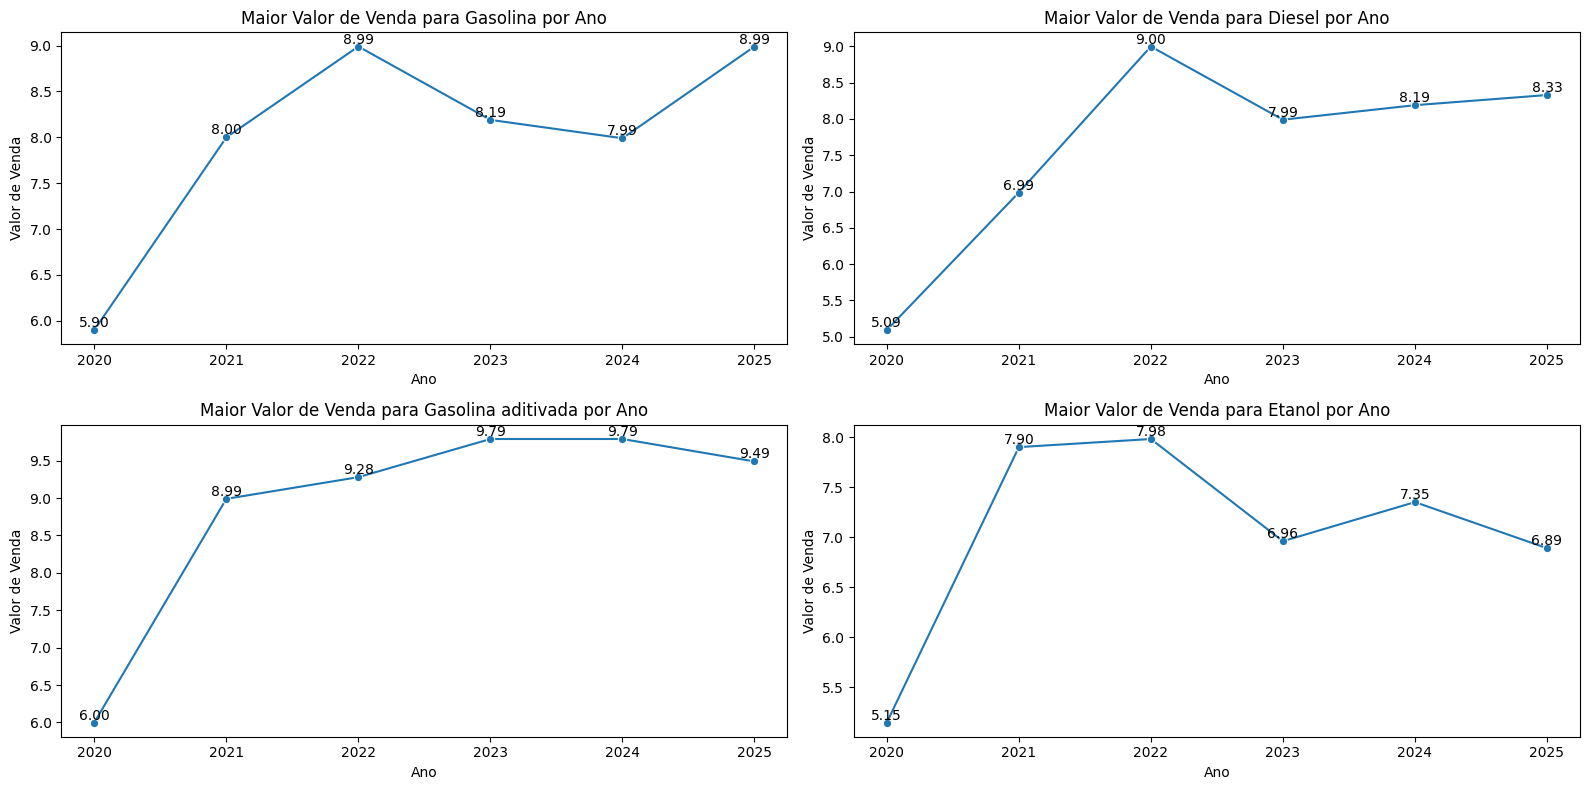

In [ ]:
# Queremos ver qual foi o maior valor de Gasolina de cada ano

tipos_produtos = ['GASOLINA','DIESEL', 'GASOLINA ADITIVADA','ETANOL']

max_valores_por_produto_ano = {}

for produto in tipos_produtos:
  df_produto = df[df['Produto'] == produto]
  max_valor_por_ano = df_produto.groupby('Ano')['Valor de Venda'].max()
  max_valores_por_produto_ano[produto] = max_valor_por_ano

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

for i, (produto, max_valores) in enumerate(max_valores_por_produto_ano.items()):
    sns.lineplot(data=max_valores, ax=axes[i], marker='o')
    axes[i].set_title(f'Maior Valor de Venda para {produto.capitalize()} por Ano')
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel('Valor de Venda')

    for ano, valor in max_valores.items():
        axes[i].text(ano, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

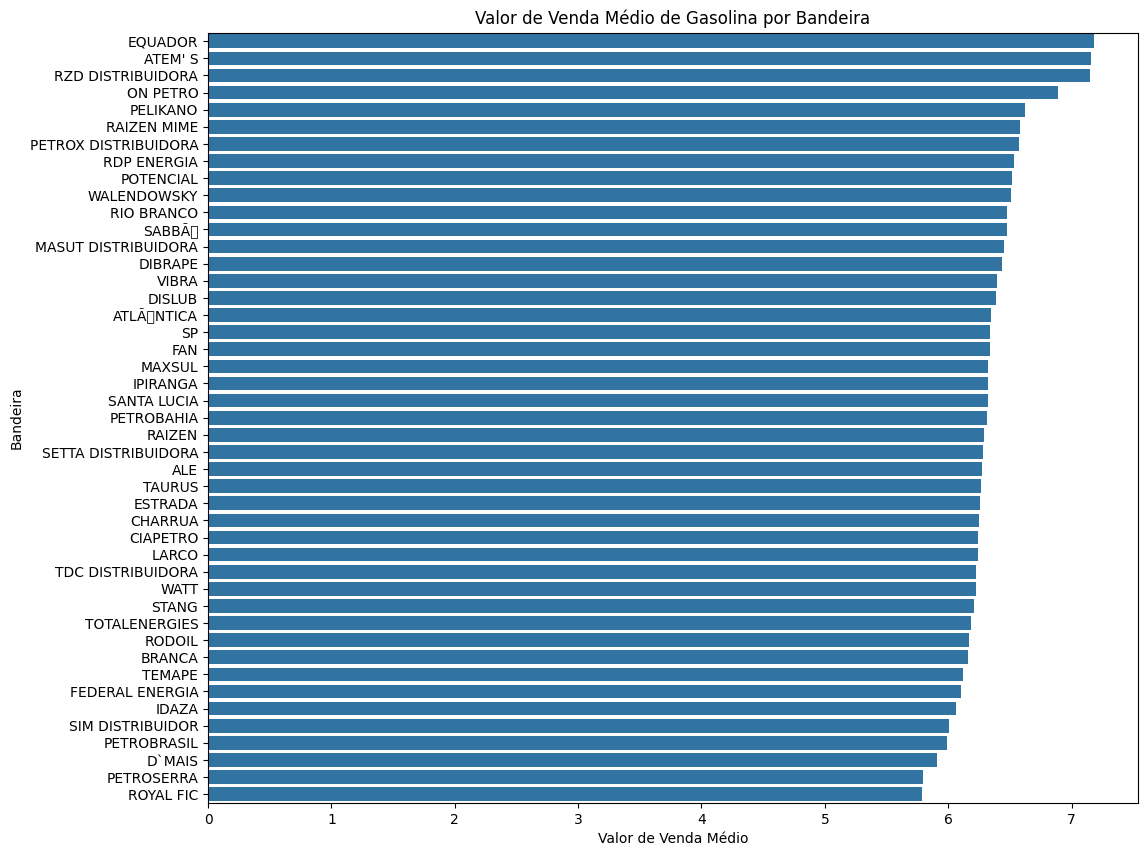

In [ ]:
# Quais bandeiras tem o maior valor de Gasolina para o menor em 2025
valor_de_venda_por_bandeira = df_2025.query('Produto == "GASOLINA"').groupby(['Bandeira'])['Valor de Venda'].mean().sort_values(ascending=False)

valor_de_venda_por_bandeira.reset_index()
plt.figure(figsize=(12, 10))
sns.barplot(y=valor_de_venda_por_bandeira.index, x=valor_de_venda_por_bandeira.values)
plt.title('Valor de Venda Médio de Gasolina por Bandeira')
plt.xlabel('Valor de Venda Médio')
plt.ylabel('Bandeira')
plt.show()

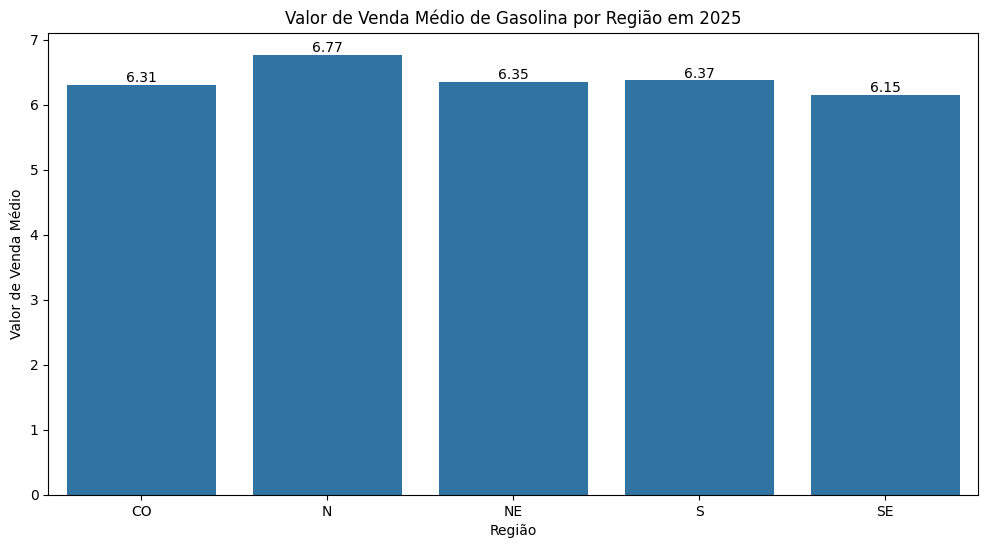

In [ ]:
# Valor de Venda Médio de Gasolina por Região
comparacao_regioes = (
    df_2025.query('Produto == "GASOLINA"')
    .groupby('Regiao')['Valor de Venda']
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Regiao', y='Valor de Venda', data=comparacao_regioes)

for index, row in comparacao_regioes.iterrows():
    ax.text(index, row['Valor de Venda'], f"{row['Valor de Venda']:.2f}", color='black', ha="center", va="bottom")


plt.title('Valor de Venda Médio de Gasolina por Região em 2025')
plt.xlabel('Região')
plt.ylabel('Valor de Venda Médio')
plt.show()

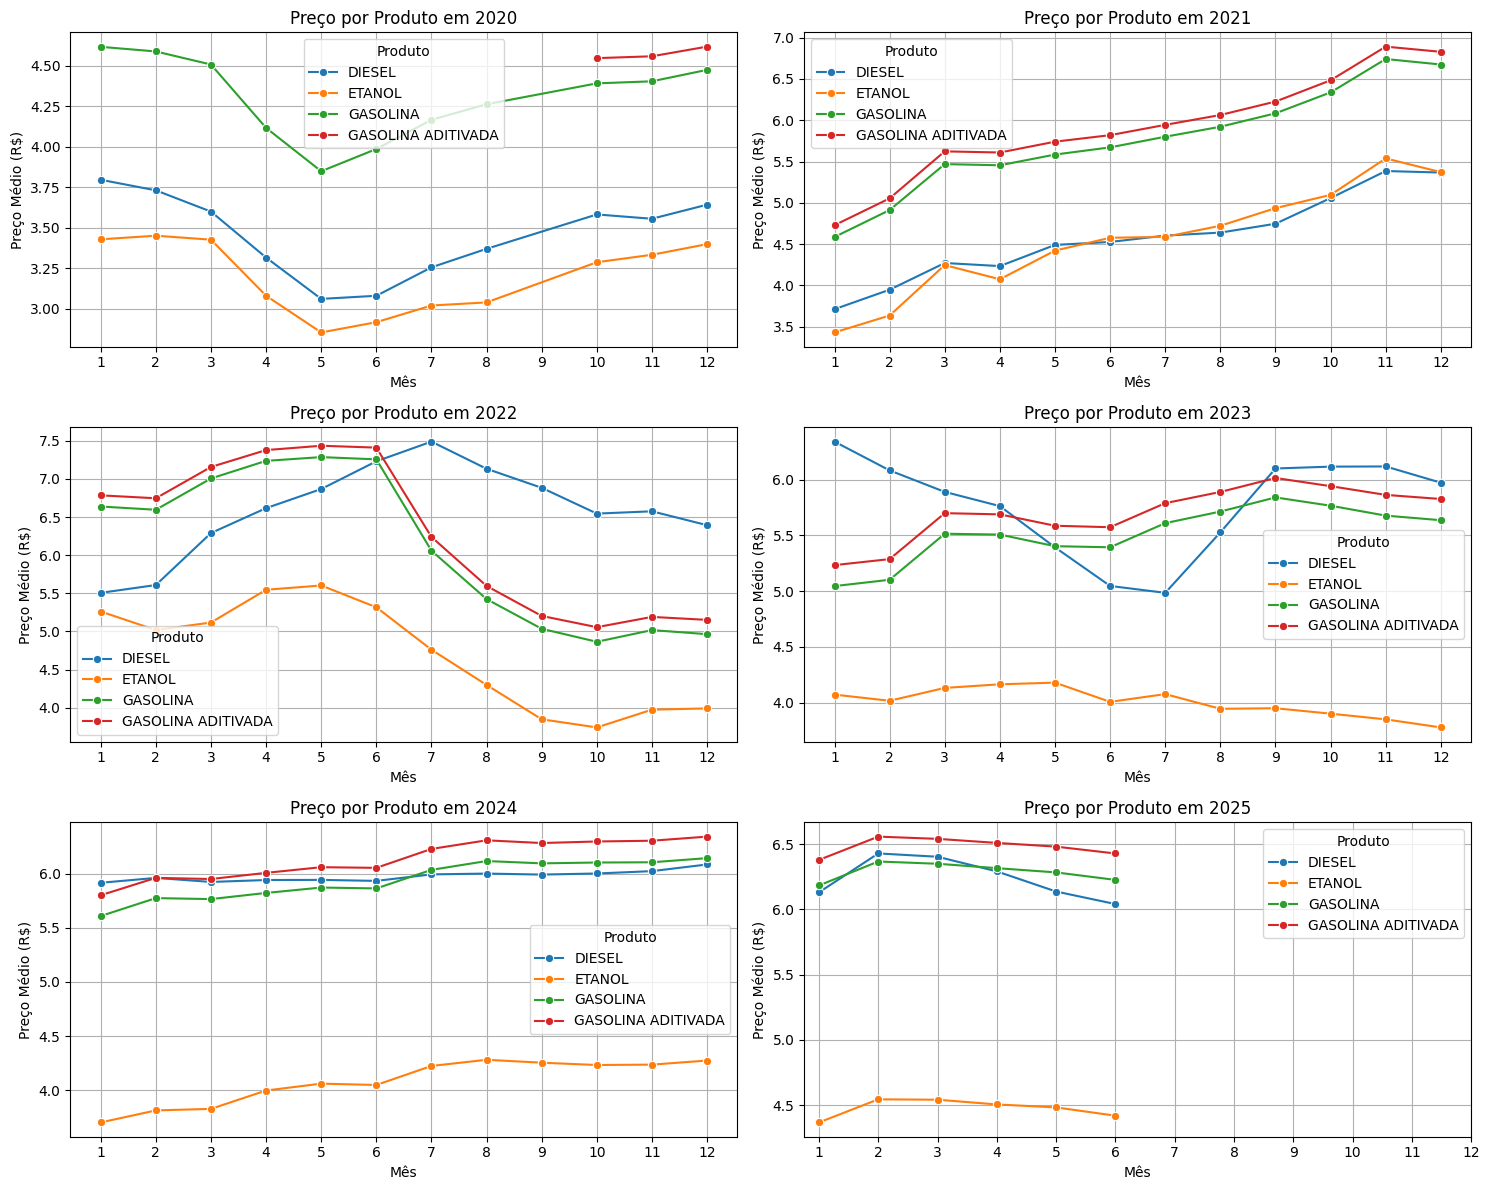

In [ ]:
# Agrupar por Mês e Produto para ver variação média sazonal para cada ano

tipos_produtos = ['GASOLINA','DIESEL', 'GASOLINA ADITIVADA','ETANOL']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, ano in enumerate(range(2020, 2026)):
    df_ano = dfs[ano]

    sazonalidade_ano = (
        df_ano.query('Produto in @tipos_produtos')
        .groupby(["Mes", "Produto"])["Valor de Venda"]
        .mean()
        .reset_index()
    )

    sns.lineplot(data=sazonalidade_ano, x="Mes", y="Valor de Venda", hue="Produto", marker="o", ax=axes[i])
    axes[i].set_title(f"Preço por Produto em {ano}")
    axes[i].set_xticks(range(1,13))
    axes[i].set_ylabel("Preço Médio (R$)")
    axes[i].set_xlabel("Mês")
    axes[i].legend(title='Produto')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

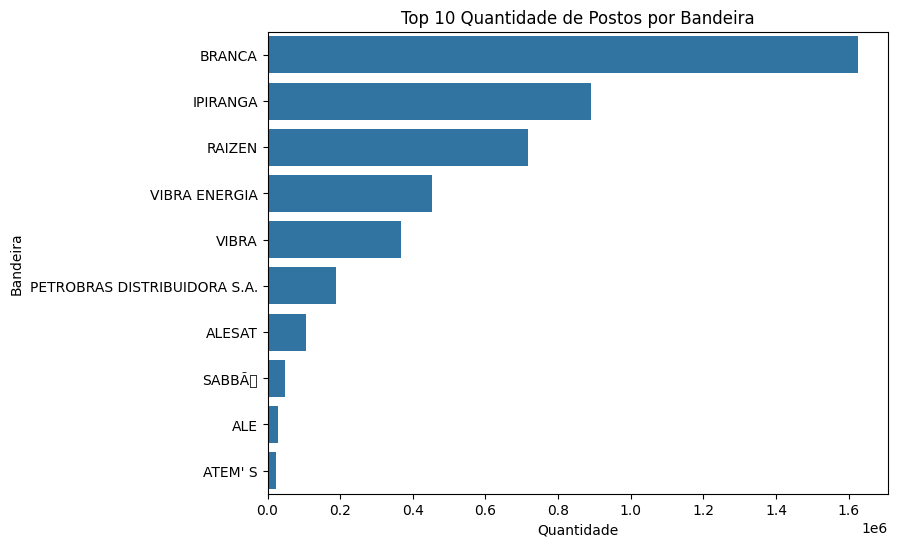

In [ ]:
# Mostrar por quantidade de postos por bandeira
contagem_bandeira = df["Bandeira"].value_counts().reset_index()
contagem_bandeira.columns = ["Bandeira", "Quantidade"]

top_10_bandeiras = contagem_bandeira.head(10)

plt.figure(figsize=(8, 6))
ax = sns.barplot(y="Bandeira", x="Quantidade", data=top_10_bandeiras)
plt.title("Top 10 Quantidade de Postos por Bandeira")
plt.xlabel("Quantidade")
plt.ylabel("Bandeira")
plt.show()

In [ ]:
# Média de preço por bandeira
preco_por_bandeira = (
    df.groupby("Bandeira")["Valor de Venda"]
      .mean()
      .reset_index()
      .sort_values(by="Valor de Venda", ascending=False)
)

preco_bandeira_branca = preco_por_bandeira[preco_por_bandeira['Bandeira'] == 'BRANCA']
preco_por_bandeira

,Bandeira,Valor de Venda
39,PETRONAC,6.640000
58,SANTA LUCIA,6.055775
47,RDP ENERGIA,5.995652
17,EQUADOR,5.973995
80,WALENDOWSKY,5.903128
...,...,...
0,ACOL,3.607048
38,PETROLUZ,3.351573
23,GRAN PETRO,3.230364
50,RM PETROLEO,3.107000


In [ ]:
# Contar quantos postos por município
concorrencia = (
    df_2025.groupby(["Regiao","Municipio"])["Revenda"]
      .nunique()
      .reset_index()
      .rename(columns={"Revenda": "Qtd_Postos"})
)

# Média de preço por município
preco_por_municipio = (
    df_2025.groupby("Municipio")["Valor de Venda"]
      .mean()
      .reset_index()
      .rename(columns={"Valor de Venda": "Preco_Medio"})
)

concorrencia_preco = pd.merge(concorrencia, preco_por_municipio, on="Municipio")

concorrencia_ordenada = concorrencia_preco.sort_values(by=["Qtd_Postos", "Preco_Medio"], ascending=[False, True])

concorrencia_ordenada.head(50)



,Regiao,Municipio,Qtd_Postos,Preco_Medio
376,SE,SAO PAULO,330,5.698121
360,SE,RIO DE JANEIRO,152,5.639952
174,S,CURITIBA,139,6.155701
245,SE,BELO HORIZONTE,123,5.718748
85,NE,FORTALEZA,121,5.942857
253,SE,CAMPINAS,108,5.701378
12,CO,GOIANIA,108,5.922034
199,S,PORTO ALEGRE,71,5.880342
282,SE,GUARULHOS,64,5.597452
137,NE,SAO LUIS,57,5.643357


In [ ]:
# Descobrindo onde é menor e o maior valor cobrado em gasolina em 2025
dic_preco_medio = {}
preco_medio_max = concorrencia_ordenada['Preco_Medio'].max()
preco_medio_min = concorrencia_ordenada['Preco_Medio'].min()

dic_preco_medio['max'] = preco_medio_max
dic_preco_medio['min'] = preco_medio_min

dic_preco_medio

df_maior_menor_preco = concorrencia_ordenada.loc[
    (concorrencia_ordenada['Preco_Medio'] == dic_preco_medio['max']) |
    (concorrencia_ordenada['Preco_Medio'] == dic_preco_medio['min'])
]

df_maior_menor_preco

,Regiao,Municipio,Qtd_Postos,Preco_Medio
242,SE,BAURU,35,5.230309
51,N,PARINTINS,9,8.293551
